This code has been prouced as a teaching resource for the UKSA space software, data and AI course run by the Space South Central Universities.

Contributors to this code includes: B. Floyd; S. Youles; B. Canning

### Learning Outcome
<div class="alert alert-block alert-info"> 
<b>NOTE</b> In this notebook we will advance our NN coding in PyTorch. Specifically we will:
    <li>Consider 'Training', 'Verification' and 'Testing' samples</li>
    <li>Train with 'Batches'</li>
    <li>Save and display the 'loss' during training</li>
    <li>Understand when to stop training</li>
</div>

In [11]:
!pip --quiet install torchvision

In [16]:
import matplotlib.pyplot as plt  # This library allows us to create and display plots which we can use to explore our data
import numpy as np  # This library helps with a variety of mathematical and array tasks
from torchvision import datasets  # This library is part of the PyTorch project but is useful in general for us to get our dataset
from torchvision.transforms import ToTensor

In [17]:
device = (
    'cuda' if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu')
print(f'Using {device = }')

Using device = 'cuda'


### 1. Import the data
Our training dataset is going to be the [MNIST database of handwritten digits](https://yann.lecun.com/exdb/mnist/).

First we will import this well known datset using PyTorch. Documentation for the avalible PyTorch datasets are here: https://pytorch.org/vision/master/datasets.html

In [18]:
# This will download and create a dataset from the training set using a PyTorch module.
mnist_training = datasets.MNIST(root='./Resources', train=True, download=True, transform=ToTensor())

# We will later use this dataset to test our trained neural network with.
mnist_testing = datasets.MNIST(root='./Resources', train=False, download=True, transform=ToTensor())

### 2. Set Train, Validation and Test sets and read in in batches

The changhes we will make in this version are that we are going to split up the training set into a training and a validation set.  We use the validation set to check on the loss in each epoch so we can keep track of whether we are overfittign or underfitting our data. 

![early_stopping](early_stopping.png)

In [23]:
import torch
# We are importing two PyTorch submodules, `nn` provides the neural network methods to define the neural network while `optim` provides the optimizer methods which we will use to define how our training will be done.
from torch import nn, optim
# PyTorch wraps its data into an iterable that allows us to break up our data into "minibatches" as we are training and allows multiprocessing to be done easily.
from torch.utils.data import DataLoader

In [100]:
### PREVIOUS CODE
#train_loader = DataLoader(mnist_training, batch_size=64, shuffle=True)
#test_loader = DataLoader(mnist_testing, batch_size=64, shuffle=True)

from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

VAL_SIZE = 0.1 # using 10% of our data as our validation sample
BATCH_SIZE = 256 # chossing a batch size

# we already have located and downloaded our training and testing datasets
#mnist_training
#mnist_testing

# we use scikitlearn to create a train / vaidiation split for us which keeps balenced classes
# generate indices: instead of the actual data we pass in integers instead
train_indices, val_indices, _, _ = train_test_split(
    range(len(mnist_training)),
    mnist_training.targets,
    stratify=mnist_training.targets,
    test_size=VAL_SIZE,
)

# generate a subset based on the indices from this sklearn train_test_split routine
train_split = Subset(mnist_training, train_indices)
val_split = Subset(mnist_training, val_indices)

# load in the batches with the dataloader
train_batches = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
val_batches = DataLoader(val_split, batch_size=BATCH_SIZE, shuffle=True)
test_batches = DataLoader(mnist_testing, batch_size=BATCH_SIZE, shuffle=True)


### 3. A second NN model

In our below model we will use the same model structure as we did last time, namely:

1. An flattened input layer
2. 5 hidden layers of 16 neurons each
3. A ReLU normalization in between each of the linear layers

But we will write it slightly differently - the previous code blocks are still there but commented out.

<div class="alert alert-block alert-success"> 
 <strong>Exercises</strong>
 <br>
 Go through the model line-by-line and make sure you understand that it is the same as before.
</div>

In [101]:
class MySecondNeuralNet(nn.Module):
    """
    Our First NN - a straightforward approach.
    """

    def __init__(self):
        """This method defines the layers that make up our NN.
        """
        # super()__init__() Gives the torch.nn.Module class the ability to 
        # call our function
        super(MySecondNeuralNet, self).__init__()

        # First, we will flatten our input data.
        self.flatten = nn.Flatten()

        ### PREVIOUS CODE ###
        #self.linear1 = nn.Linear(784, 16) # This is our input layer
        #self.activation = nn.ReLU() # our relu activation function
        #self.linear2 = nn.Linear(16, 16) # our 16 neuron layers
        #self.linear3 = nn.Linear(16, 10) # our output layer for numbers 0-9

        # this time we will use the sequential layers function
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 16),  # This is our input layer
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 10)   # This is our output layer
        )

    def forward(self, x):
        """This method does the forward pass operation in the network."""

        ### PREVIOUS CODE ###
        #x = self.flatten(x)
        #x = self.linear1(x)
        #x = self.activation(x)
        #x = self.linear2(x)
        #x = self.activation(x)
        #x = self.linear2(x)
        #x = self.activation(x)
        #x = self.linear2(x)
        #x = self.activation(x)
        #x = self.linear2(x)
        #x = self.activation(x)
        #x = self.linear3(x)        
        #return x
        
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

model = MySecondNeuralNet().to(device)
print(model)

MySecondNeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=10, bias=True)
  )
)


Now let's train.

### 4. Adding batches, saving the loss and running on validation sets

The steps in training are the same as before but this time we will also run on the validation data.

* Put model into ‘train’ mode:  model.train()
* For each 'epoch' of training and ‘batch’ of data:
    1. Reset gradient to zero - incase not
    2. Predict outputs from inputs
    3. Calculate loss (and acuracy if we want to save it - and on validation data)
    4. Compute gradients using backpropagation
    5. Update parameters
    6. Go back to 1.
 
We will also stick with the same optimizer and loss.

In [102]:
# common loss function for classification tasks is the CrossEntropyLoss - see below
# common stochastic gradient descent optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
# we will assume each batch is a bathc of one and therefore not define it right now
# we will train for only 5 epochs

In [103]:
!pip --quiet install tensorboard

In [104]:
### PREVIOUS CODE
#model.train() # model is now in 'train' mode
#for epoch in range(5):
#    for images, labels in train_loader:
#        images, labels = images.to(device), labels.to(device)
#        optimizer.zero_grad() #reset grdient to zero - 1.
#        outputs = model(images) # predict outputs from inputs - 2.
#        loss = nn.CrossEntropyLoss()(outputs, labels) # calculate loss - 3.
#        loss.backward() # compute gradients using backpropagation - 4.
#        optimizer.step() # update parameters - 5. 
#        # for loop takes us back to 1.

# This time we defien a fucntion for trianing and another for validation

from torch.autograd import Variable
from torch.utils.tensorboard import SummaryWriter

def MyTrainFunction(dataloader, model, optimizer):
    '''
    This is our training function which is now storing the loss.
    Model should be in train mode.
    '''
    size = 0
    num_batches = len(dataloader)

    model.train() # model is now in 'train' mode

    # create empty data structures for storing stuff for computing accuracy and loss per batch
    batch_loss = np.zeros(num_batches)
    batch_accuracy = np.zeros(num_batches)
    correct = 0
    _correct = 0

    for batch, (images, labels) in enumerate(dataloader):
        # the below is just like our images, labels = images.to(device), labels.to(device)
        images, labels = images.to(device), labels.to(device)
        model.to(device)
        
        optimizer.zero_grad() #reset grdient to zero - 1.
        outputs = model(images) # predict outputs from inputs - 2.
        loss = nn.CrossEntropyLoss()(outputs, labels) # calculate loss - 3.
        loss.backward() # compute gradients using backpropagation - 4.
        optimizer.step() # update parameters - 5. 

        #now we compute stuff
        _correct = (outputs.argmax(1) == labels).type(torch.float).sum().item()
        _batch_size = len(images)
        correct += _correct

        # Updating loss_batch and batch_accuracy for storing and printing
        batch_loss[batch] = loss.item()
        batch_accuracy[batch] = _correct/_batch_size
        
        size += _batch_size

        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(images)
        #    print(f"loss: {loss:>7f}  [{current:>5d}]")

        # for loop takes us back to 1.

    correct/=size
    print(f"Train Accuracy: {(100*correct):>0.1f}%")

    return batch_loss , batch_accuracy


def MyValidationFunction(dataloader, model): 
    '''
    This is our validation function which is also storing the loss but does not update.
    Model should be in eval mode.
    '''
    size = 0
    num_batches = len(dataloader)

    model.eval() # Model is now in 'evaluation' mode.

    test_loss, correct = 0, 0 ### test_loss
    _correct = 0
    _batch_size = 0 ####
    batch_loss = np.zeros(num_batches)
    batch_accuracy = np.zeros(num_batches)

    with torch.no_grad(): # we are not backpropagating and updating - we are only evaluating

        for batch, (images, labels) in enumerate(dataloader):
            # the below is just like our images, labels = images.to(device), labels.to(device)
            images, labels = images.to(device), labels.to(device)
            model.to(device)
            outputs = model(images) # predict outputs from inputs - 2.

            batch_loss[batch] = nn.CrossEntropyLoss()(outputs, labels)
            test_loss += batch_loss[batch]            
            _batch_size = len(images)

            #now we compute stuff
            _correct = (outputs.argmax(1) == labels).type(torch.float).sum().item()
            correct += _correct

            # Updating loss_batch and batch_accuracy for storing and printing
            batch_accuracy[batch] = _correct/_batch_size
        
            size += _batch_size

        ## Calculating loss based on loss function defined
        test_loss /= num_batches
        correct/=size

        print(f"Valid loss: {(100*correct):>0.1f}%")
        print(f"Val avg loss: {test_loss:>8f} \n")

    return batch_loss , batch_accuracy



Now that our model has been trained, we can test it by evaluating our testing data

In [105]:
# define some empty lists to appeand results to
train_batch_loss = []
train_batch_accuracy = []
valid_batch_loss = []
valid_batch_accuracy = []
train_epoch_no = []
valid_epoch_no = []

train_batch_loss_av = []
train_batch_accuracy_av = []
valid_batch_loss_av = []
valid_batch_accuracy_av = []

# and let's run our train_batches and val_batches codes -
epochs = 40
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    _train_batch_loss , _train_batch_accuracy = MyTrainFunction(train_batches, model, optimizer)
    _valid_batch_loss , _valid_batch_accuracy = MyValidationFunction(val_batches, model)

    for i in range(len(_train_batch_loss)):
        train_batch_loss.append(_train_batch_loss[i])
        train_batch_accuracy.append(_train_batch_accuracy[i])
        train_epoch_no.append( t + float((i+1)/len(_train_batch_loss)))

    train_batch_loss_av.append(_train_batch_loss.mean())
    train_batch_accuracy_av.append(_train_batch_accuracy.mean())
        
    for i in range(len(_valid_batch_loss)):
        valid_batch_loss.append(_valid_batch_loss[i])
        valid_batch_accuracy.append(_valid_batch_accuracy[i])
        valid_epoch_no.append( t + float((i+1)/len(_valid_batch_loss)))

    valid_batch_loss_av.append(_valid_batch_loss.mean())
    valid_batch_accuracy_av.append(_valid_batch_accuracy.mean())

print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 45.0%
Valid loss: 69.4%
Val avg loss: 0.911654 

Epoch 2
-------------------------------
Train Accuracy: 76.5%
Valid loss: 81.3%
Val avg loss: 0.634298 

Epoch 3
-------------------------------
Train Accuracy: 83.6%
Valid loss: 85.8%
Val avg loss: 0.489047 

Epoch 4
-------------------------------
Train Accuracy: 86.6%
Valid loss: 87.5%
Val avg loss: 0.439024 

Epoch 5
-------------------------------
Train Accuracy: 88.1%
Valid loss: 88.3%
Val avg loss: 0.409554 

Epoch 6
-------------------------------
Train Accuracy: 89.1%
Valid loss: 89.4%
Val avg loss: 0.374616 

Epoch 7
-------------------------------
Train Accuracy: 89.9%
Valid loss: 89.9%
Val avg loss: 0.345799 

Epoch 8
-------------------------------
Train Accuracy: 90.7%
Valid loss: 90.5%
Val avg loss: 0.332799 

Epoch 9
-------------------------------
Train Accuracy: 91.4%
Valid loss: 91.1%
Val avg loss: 0.310041 

Epoch 10
-------------------------------
Train Accuracy

And let's plot our losses...

### 5. Plot the loss functions and accuracy

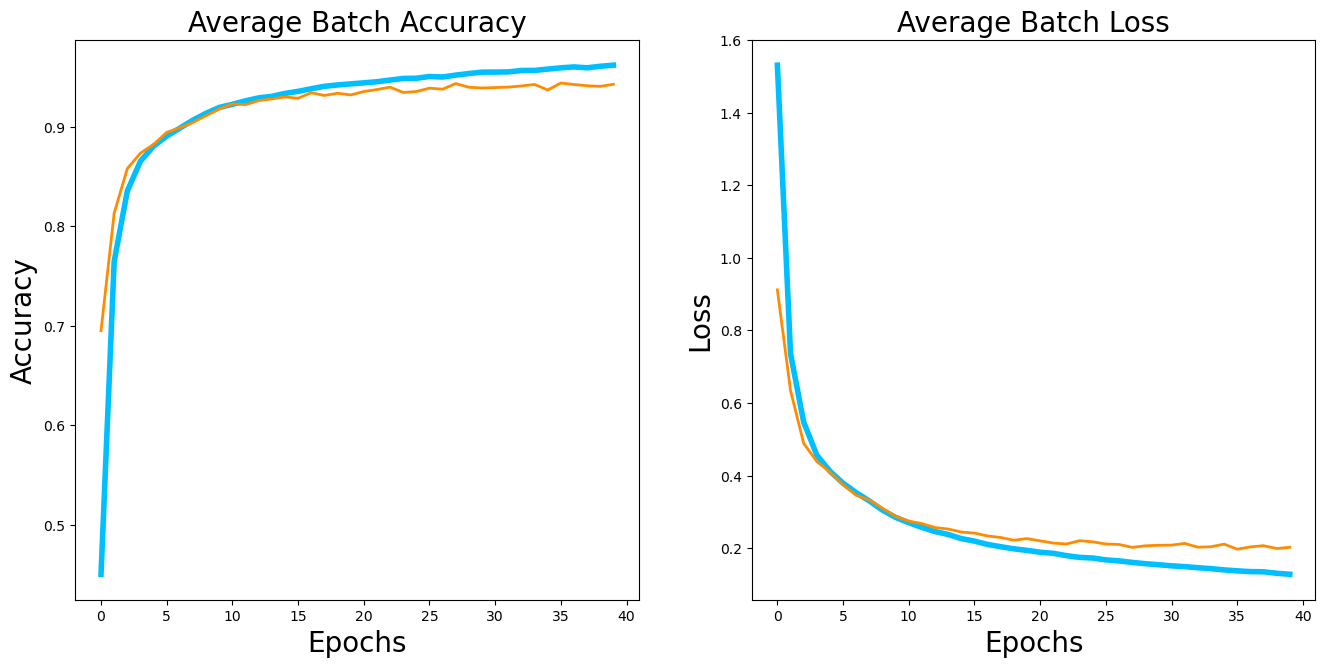

In [106]:
figure = plt.figure(figsize=(16, 16))

figure.add_subplot(2, 2, 1)
plt.plot(train_batch_accuracy_av, color='deepskyblue', label='Train', ls='-', linewidth=4)
plt.plot(valid_batch_accuracy_av, color='darkorange', label='Validation', linewidth=2)
plt.title("Average Batch Accuracy", fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)

figure.add_subplot(2, 2, 2)
plt.plot(train_batch_loss_av, color='deepskyblue', label='Train', ls='-', linewidth=4)
plt.plot(valid_batch_loss_av, color='darkorange', label='Validation', linewidth=2)
plt.title("Average Batch Loss", fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Loss", fontsize=20)

plt.show()

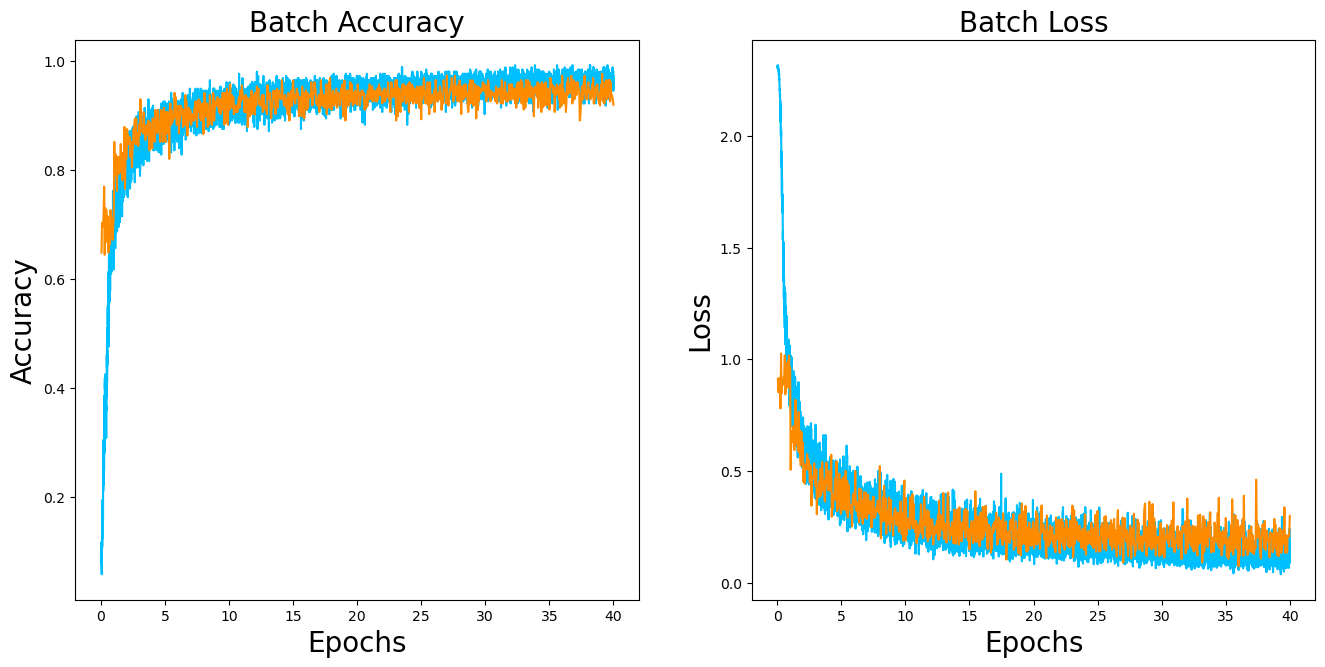

In [107]:
figure = plt.figure(figsize=(16, 16))

figure.add_subplot(2, 2, 1)
plt.plot(train_epoch_no , train_batch_accuracy, color='deepskyblue', label='Train')
plt.plot(valid_epoch_no , valid_batch_accuracy, color='darkorange', label='Validation')
plt.title("Batch Accuracy", fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)

figure.add_subplot(2, 2, 2)
plt.plot(train_epoch_no , train_batch_loss, color='deepskyblue', label='Train')
plt.plot(valid_epoch_no , valid_batch_loss, color='darkorange', label='Validation')
plt.title("Batch Loss", fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Loss", fontsize=20)

plt.show()

<div class="alert alert-block alert-success"> 
 <strong>Exercises</strong>
 <br>
 Try to change some of the hyperparameters of the training, for example:
 <br>
 <li> Number of batches</li>
 <li> Number of epochs</li>
 <br>
 Plot these and try to find the 'early stopping' point of your training. How might you change your code to ask it to stop when it reaches this point?

</div>

<div class="alert alert-block alert-success"> 
 <strong>Exercises</strong>
 <br>
 Try to make a new model - we have been usign only fully connected NN - try a convolutional NN (CNN) next. For this you will need to look into
 <li>nn.Conv2d</li>
 <li>nn.MaxPool2d</li>
 <li>nn.ConvTranspose2d</li>
as the model components of the CNN. 
</div>